In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

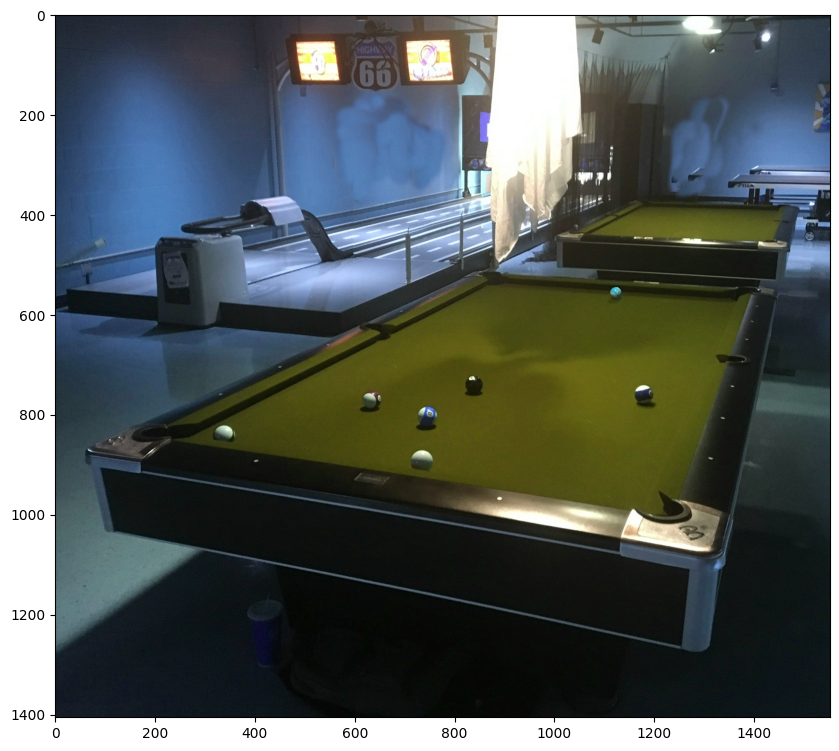

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [2]:
img = cv2.imread('figure1-assignment3.jpg')                 # reading image
plt.figure(figsize=(10, 10)), plt.imshow(img), plt.show()   # plotting image

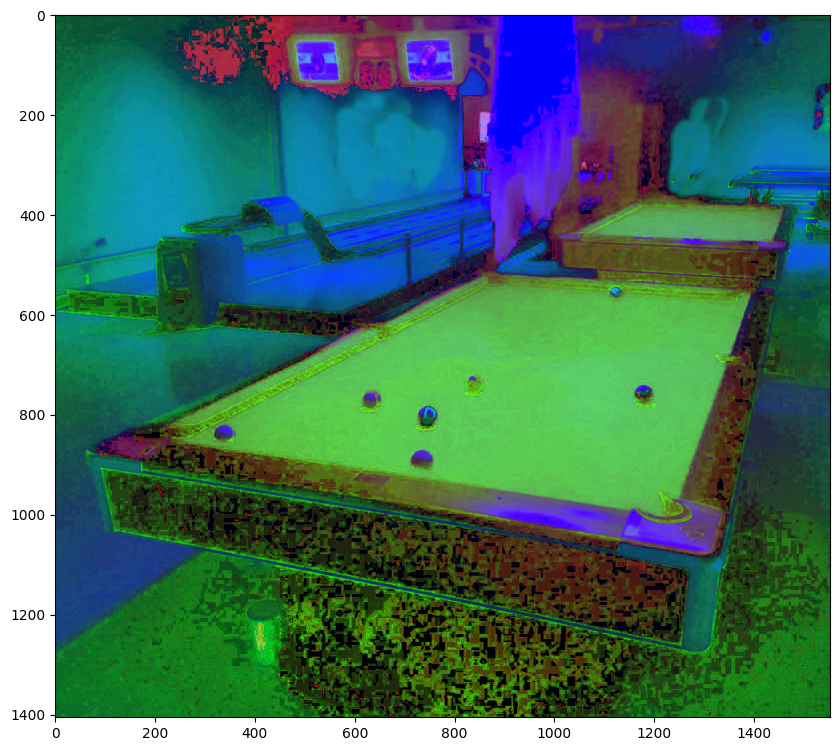

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)                  # converting image to hsv
plt.figure(figsize=(10, 10)), plt.imshow(hsv), plt.show()   # plotting hsv image

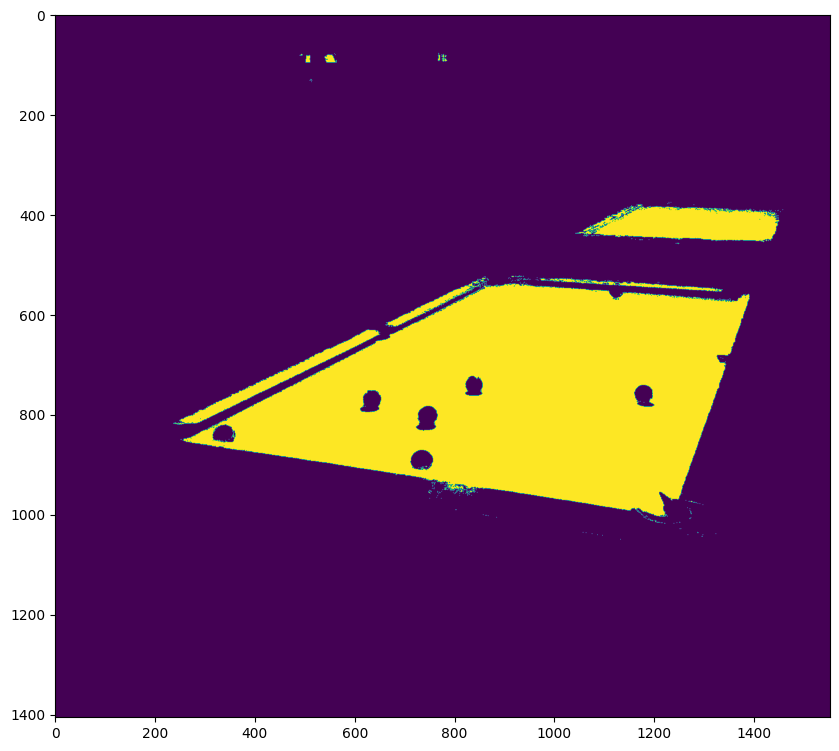

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [4]:
lower_green = np.array([45, 130, 45])                       # setting lower green values
upper_green = np.array([100, 255, 255])                     # setting higher green values
mask = cv2.inRange(hsv, lower_green, upper_green)           # creating a mask filtering hsv image to focus on greens of the pool table
plt.figure(figsize=(10, 10)), plt.imshow(mask), plt.show()  # plotting mask

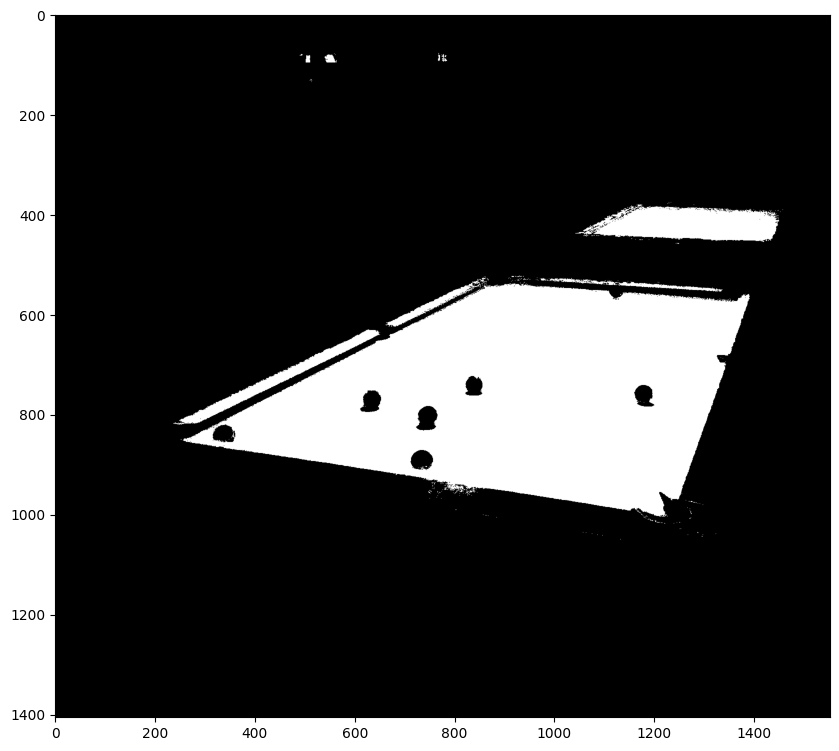

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [5]:
mask_gray = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)              # visualizing mask in grayscale
plt.figure(figsize=(10, 10)), plt.imshow(mask_gray), plt.show() # plotting grayscale mask

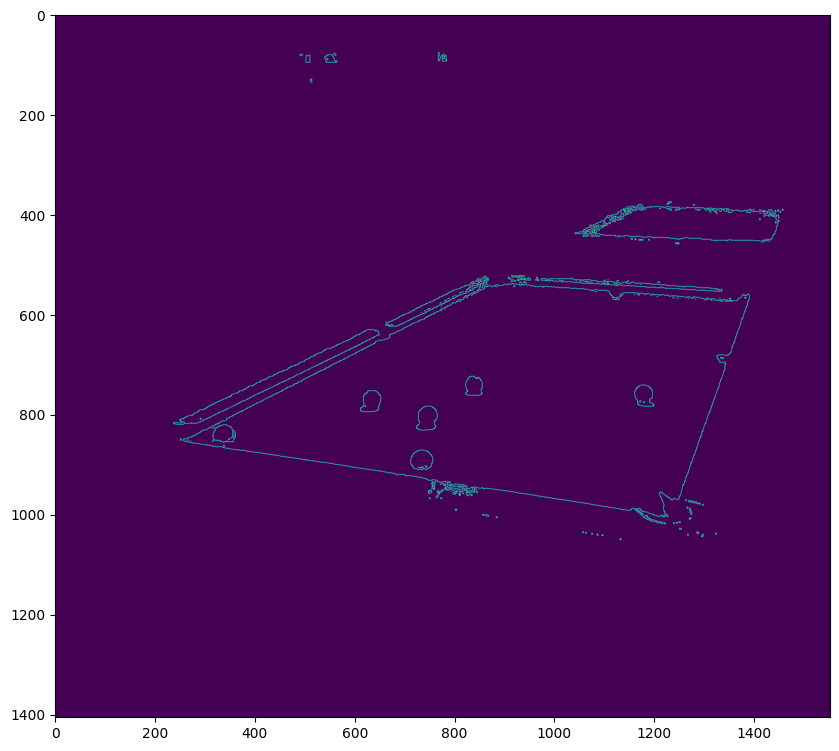

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [6]:
edges = cv2.Canny(mask_gray, 800, 800, apertureSize=7)          # finding edges of gray mask
plt.figure(figsize=(10, 10)), plt.imshow(edges), plt.show()     # plotting edges

In [7]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 165)      # finding hough lines using edges
print('number of lines: {}'.format(lines.shape))        # number of lines found based on values

number of lines: (8, 1, 2)


In [8]:
def houghIntersection(line1, line2):    # function to find the intersection of two hough lines using their respective rhos and thetas
    rho1, theta1 = tuple(line1[0])
    rho2, theta2 = tuple(line2[0])

    A = np.array([
        [np.cos(theta1), np.sin(theta1)], 
        [np.cos(theta2), np.sin(theta2)]
    ])

    b = np.array([
        rho1,
        rho2
    ])

    return list(map(lambda x: int(x), np.linalg.lstsq(A, b, rcond=None)[0]))

In [9]:
corners = [                                     # finding intersection of hough lines 
    houghIntersection(lines[1], lines[2]),
    houghIntersection(lines[1], lines[7]),
    houghIntersection(lines[2], lines[6]),
    houghIntersection(lines[6], lines[7]),
]

corners

[[227, 847], [889, 524], [1233, 1006], [1395, 559]]

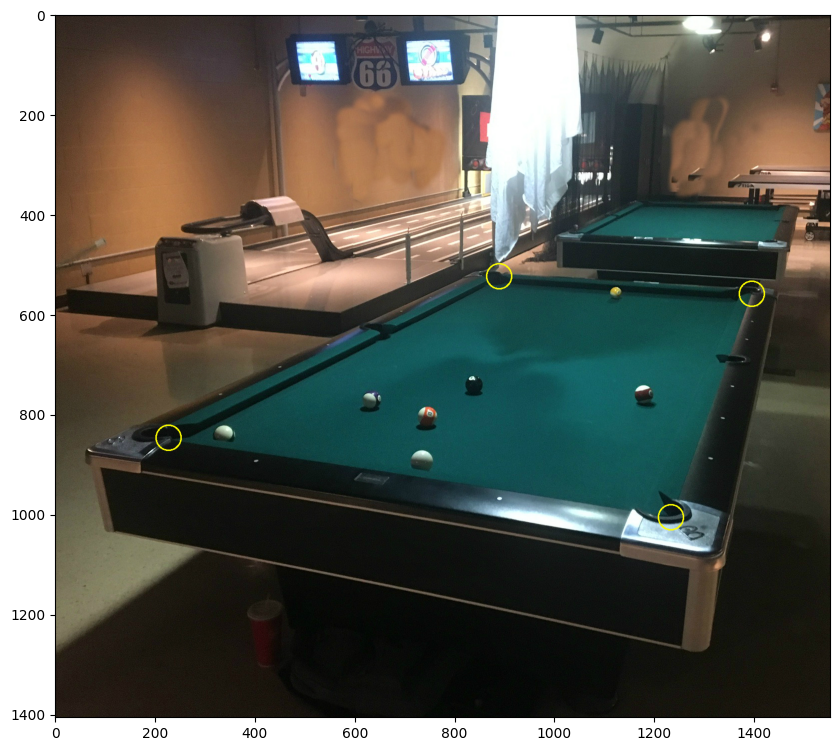

(<Figure size 1000x1000 with 1 Axes>,
 None,
 True)

In [10]:
bg = img.copy()                                                                                         # creating original image copy

for corner in corners:                                                                                  # iterating through corners
    x0, y0 = tuple(corner)
    cv2.circle(bg, corner, 25, (0, 255, 255), 2)                                                        # drawing circles at corner coordinates

bg_rgb = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10)), plt.imshow(bg_rgb), plt.show(), cv2.imwrite('detected_corners.jpg', bg)   # plotting resultant image